In [1]:
import torch
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
device=torch.device('cuda:0')
torch.cuda.set_device(device)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# use bigger pyplot font sizes
plt.rcParams.update({'font.size': 12})

/home/wenhan/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# reload ScalingDimensions
import importlib
import ScalingDimensions
importlib.reload(ScalingDimensions)

from ScalingDimensions import show_diff,show_scaling_dimensions,get_scaling_dimensions

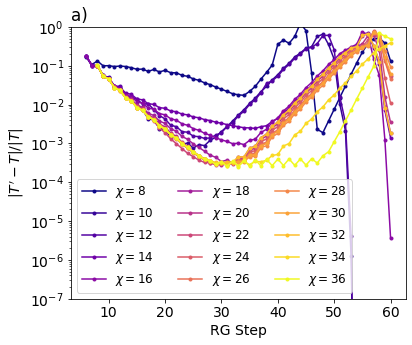

In [25]:
# diff_curve,effective_rank_curve,scaling_dimensions_curve
chis=[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
curves=[]
for chi in chis:
    curves.append(torch.load('data/X'+str(chi)+'/hotrg_gilt_X'+str(chi)+'_curves.pth'))



cmap=plt.get_cmap('plasma')
plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})
plt.figure(figsize=(6,5))
for iChi,(chi,curve) in enumerate(zip(chis,curves)):
    plt.plot(curve[0]['layer'],curve[0]['diff'],'.-',label='$\chi='+str(chi)+'$',color=cmap(iChi/(len(chis)-1)))
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend(ncol=3)
plt.title('a)',loc='left')
plt.show()

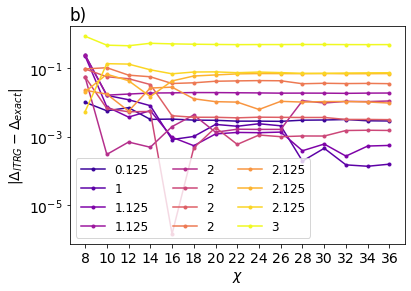

In [31]:
chis=[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
ref_scdim=[0]+[.125]+[1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9+[4.125]*9+[5]*13+[5.125]*14
scdimss=[]
for chi in chis:
    path='data/X'+str(chi)+'/hotrg_gilt_X'+str(chi)+'_lTRG_gilt_L30_scdims.txt'
    txt=open(path,'r').read().replace('[','').replace(']','')
    scdimss.append(np.fromstring(txt,sep=' '))
scdimss=np.stack(scdimss)
cmap=plt.get_cmap('plasma')
n=13
for iOp in range(1,n):
    plt.plot(chis,np.abs(scdimss[:,iOp]-ref_scdim[iOp]),'.-',color=cmap(iOp/(n-1)),label=str(ref_scdim[iOp]))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$|\Delta_{lTRG}-\Delta_{exact}|$')
plt.xticks(chis)
plt.legend(ncol=3)
plt.title('b)',loc='left')
plt.show()

[2.2691997695963826, 2.2692033352497334, 2.2691961500784528, 2.2691978234132772, 2.269207121906046, 2.2692015889531927, 2.2692008814054514, 2.2692000548146765, 2.26920064777386, 2.269200351449797, 2.2692001909563846, 2.2691999913438377, 2.2692000086019646, 2.269199972395373, 2.269200046858167]
2.269185314213022
[0.44068399 0.44068329 0.44068469 0.44068436 0.44068256 0.44068363
 0.44068377 0.44068393 0.44068382 0.44068387 0.4406839  0.44068394
 0.44068394 0.44068395 0.44068393]
0.44068679350977147


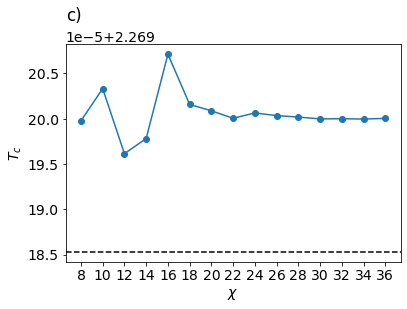

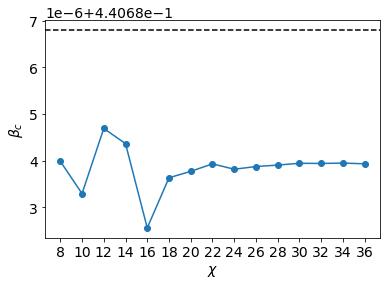

In [34]:
Tcs=[]
for chi in chis:
    path='data/X'+str(chi)+'/hotrg_gilt_X'+str(chi)+'_Tc.pth'
    Tc=1/torch.load(path)['beta']
    Tcs.append(Tc)

exact_Tc=2/np.log(1+np.sqrt(2))

print(Tcs)
print(exact_Tc)

print(1/np.array(Tcs))
print(1/exact_Tc)

plt.figure(figsize=(6,4))
plt.plot(chis,Tcs,'o-')
plt.axhline(exact_Tc,color='k',linestyle='--')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$T_c$')
plt.xticks(chis)
plt.title('c)',loc='left',y=1.08)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(chis,1/np.array(Tcs),'o-')
plt.axhline(1/exact_Tc,color='k',linestyle='--')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\beta_c$')
plt.xticks(chis)
plt.show()


  0%|          | 0/61 [00:00<?, ?it/s]

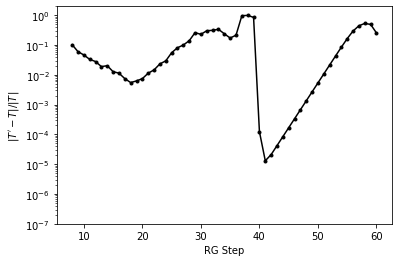

  0%|          | 0/61 [00:00<?, ?it/s]

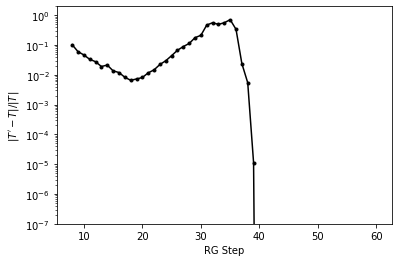

  0%|          | 0/61 [00:00<?, ?it/s]

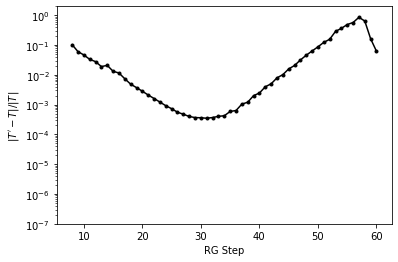

  0%|          | 0/61 [00:00<?, ?it/s]

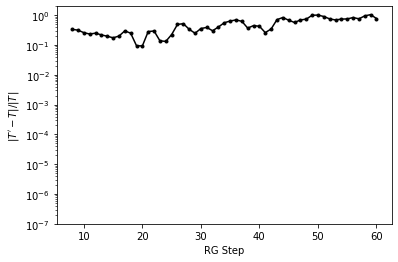

  0%|          | 0/61 [00:00<?, ?it/s]

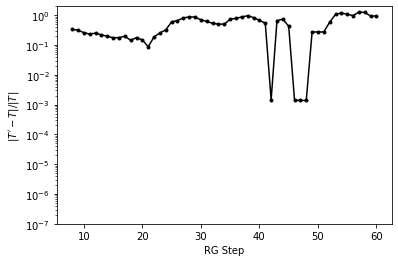

In [4]:
optionsH,paramsH,layersH,TsH,logTotalsH=torch.load('data/hotrg_gilt_X24_highB.pth',map_location=device)
curveH=show_diff(TsH,stride=2) # high B = low T

optionsL,paramsL,layersL,TsL,logTotalsL=torch.load('data/hotrg_gilt_X24_lowB.pth',map_location=device)
curveL=show_diff(TsL,stride=2)

optionsM,paramsM,layersM,TsM,logTotalsM=torch.load('data/hotrg_gilt_X24.pth',map_location=device)
curveM=show_diff(TsM,stride=2)

optionsNG,paramsNG,layersNG,TsNG,logTotalsNG=torch.load('data/hotrg_X24.pth',map_location=device)
curveNG=show_diff(TsNG,stride=2)

optionsNM,paramsNM,layersNM,TsNM,logTotalsNM=torch.load('data/hotrg_nomcf_X24.pth',map_location=device)
curveNM=show_diff(TsNM,stride=2)



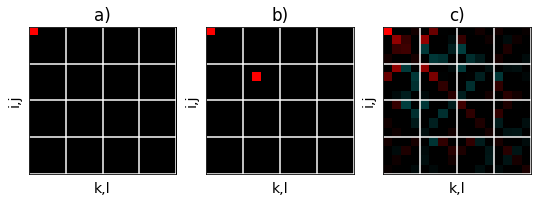

In [5]:
import importlib
import utils
importlib.reload(utils)

from utils import show_tensor_ijkl
plt.figure(figsize=(9,3))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.subplot(131)
show_tensor_ijkl(TsL[40].cpu().numpy(),4) # low B = high T
plt.title('a)')
plt.subplot(132)
show_tensor_ijkl(TsH[40].cpu().numpy(),4)
plt.title('b)')
plt.subplot(133)
show_tensor_ijkl(TsM[30].cpu().numpy(),4)
plt.title('c)')
plt.show()

In [6]:
betaH=paramsH['beta']
betaL=paramsL['beta']
betaM=paramsM['beta']
TH=1/betaH
TL=1/betaL
TM=1/betaM
TM-TL

-5.053141749122858e-05

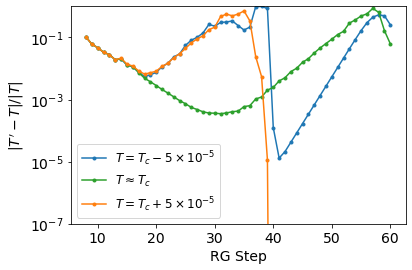

In [7]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.plot(curveH['layer'],curveH['diff'],'.-',color='tab:blue',label=r'$T=T_c-5\times10^{-5}$')
plt.plot(curveM['layer'],curveM['diff'],'.-',color='tab:green',label=r'$T\approx T_c$')
plt.plot(curveL['layer'],curveL['diff'],'.-',color='tab:orange',label=r'$T=T_c+5\times10^{-5}$')
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.show()

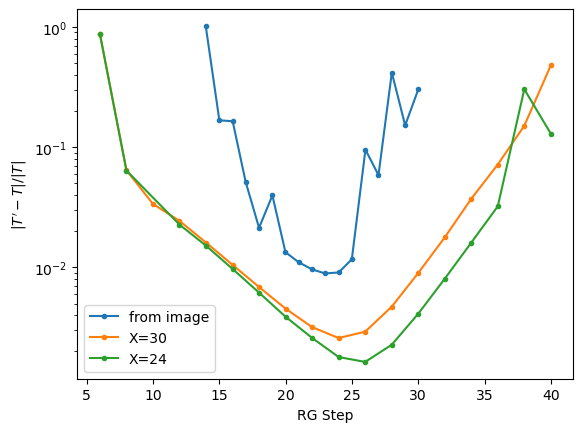

In [103]:

data_bl=pd.read_csv('data/brucelyu_RGFlow_fromImage.csv', names=['step','diff'])
data_bl2=pd.read_csv('data/brucelyu_RGFlow_X30.csv', names=['step','diff'])
data_bl2['step']=data_bl2['step']*2
data_bl3=pd.read_csv('data/brucelyu_RGFlow_X24.csv', names=['step','diff'])
data_bl3['step']=data_bl3['step']*2

plt.plot(data_bl['step'],data_bl['diff'],'.-',label='from image')
plt.plot(data_bl2['step'],data_bl2['diff'],'.-',label='X=30')
plt.plot(data_bl3['step'],data_bl3['diff'],'.-',label='X=24')
plt.yscale('log')
#plt.ylim(1e-2,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.show()

In [104]:
len(data_bl2)

18

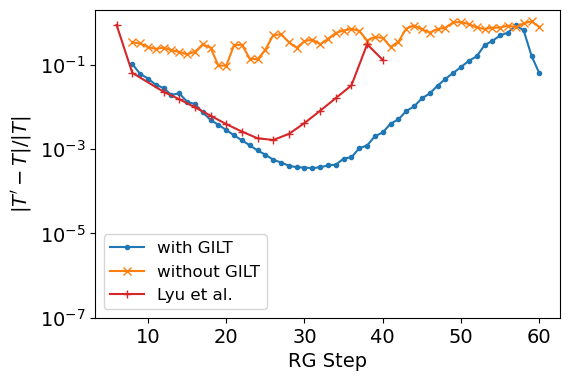

In [107]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
plt.plot(curveM['layer'],curveM['diff'],'.-',color='C0',label='with GILT')
plt.plot(curveNG['layer'],curveNG['diff'],'x-',color='C1',label='without GILT')
# plt.plot(data_bl['step'],data_bl['diff'],'+-',color='C2',label='Brucelyu')
plt.plot(data_bl3['step'],data_bl3['diff'],'+-',color='C3',label='Lyu et al.')
plt.yscale('log')
plt.ylim(1e-7,2)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
plt.legend()
plt.show()


  0%|          | 0/61 [00:00<?, ?it/s]

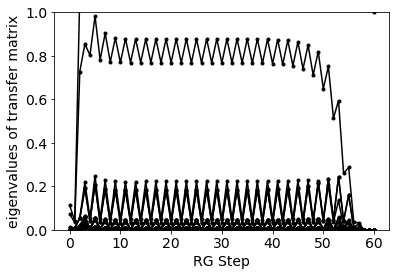

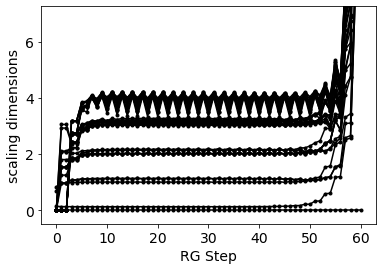

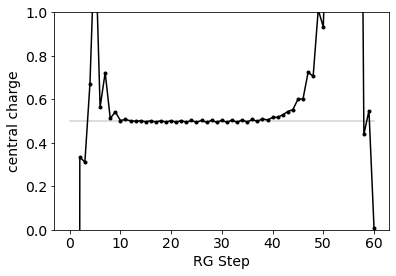

  0%|          | 0/61 [00:00<?, ?it/s]

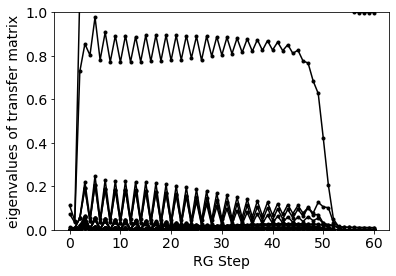

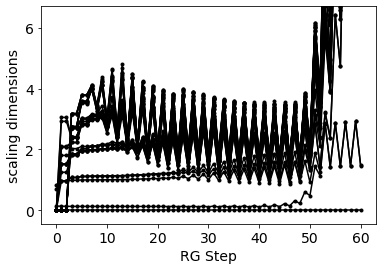

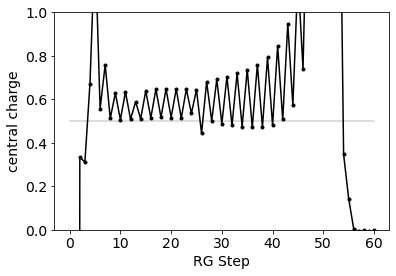

In [14]:
curve1M=show_scaling_dimensions(TsM,num_scaling_dims=32,display=True,stride=1,is_HOTRG=True,reference_center_charge=.5)
curve1NG=show_scaling_dimensions(TsNG,num_scaling_dims=32,display=True,stride=1,is_HOTRG=True,reference_center_charge=.5)

In [18]:
reference_scaling_dimensions=[
    0,.125,1,1.125,
    2,2.125,3,3.125,
    4]
reference_center_charge=.5
ref_scd=np.array([0,.125,1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9)

In [19]:
#curve_scd_M=show_scaling_dimensions(TsM,num_scaling_dims=32,is_HOTRG=True,reference_scaling_dimensions=reference_scaling_dimensions,reference_center_charge=reference_center_charge)
scd_cyl_iLayer=np.array(curve1M['layer'].tolist())

scd_cyl=np.array(curve1M['scaling_dimensions'].tolist())
scd_cyl_err=np.abs(scd_cyl-ref_scd)

scd_cyl_NG=np.array(curve1NG['scaling_dimensions'].tolist())
scd_cyl_err_NG=np.abs(scd_cyl_NG-ref_scd)

In [20]:
scd_ltrg_iLayers=[*range(2,60,2)]
scd_ltrg=[]
for iLayer in scd_ltrg_iLayers:
    filename='data/layers/hotrg_gilt_X24_lTRG_gilt_L%d.pth'%iLayer
    options,sr,ur=torch.load(filename,map_location=device)
    print(filename)
    scd_ltrg.append(get_scaling_dimensions(sr,scaling=2).tolist())
    del options,sr,ur
scd_ltrg=np.array(scd_ltrg)

scd_ltrg_err=np.abs(scd_ltrg-ref_scd)


data/layers/hotrg_gilt_X24_lTRG_gilt_L2.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L4.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L6.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L8.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L10.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L12.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L14.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L16.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L18.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L20.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L22.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L24.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L26.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L28.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L30.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L32.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L34.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L36.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L38.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L40.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L42.pth
data/layers/hotrg_gilt_X24_lTRG_gilt_L44.pth
data/layers/ho

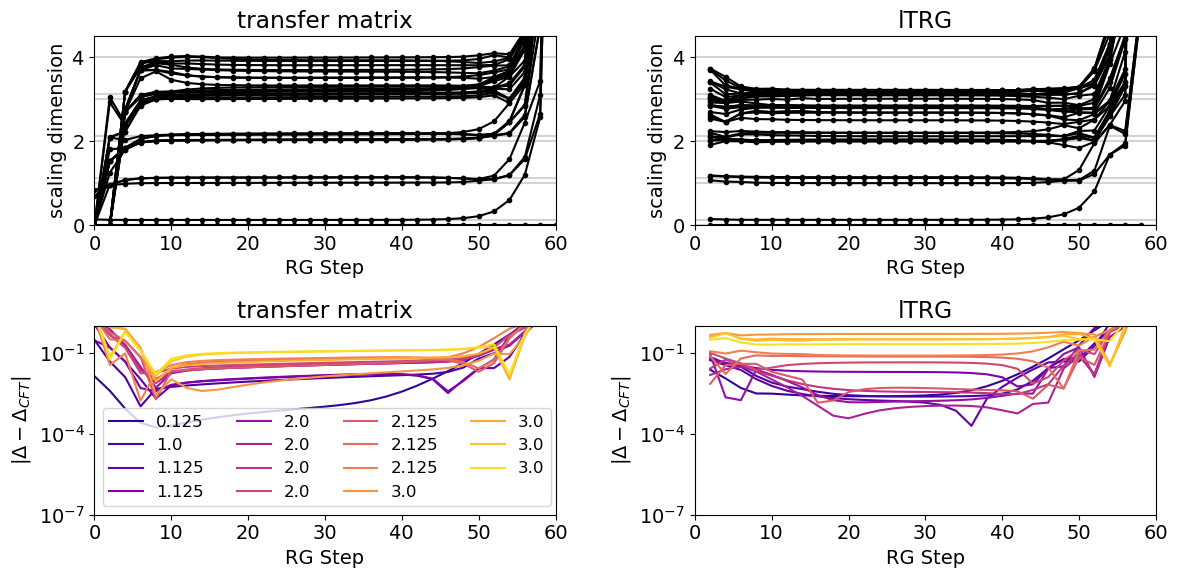

In [35]:


plt.figure(figsize=(12,6))
# increase the font size for captions and axis labels and ticks and legends
plt.rcParams.update({'font.size': 14,'legend.fontsize':12,'xtick.labelsize':14,'ytick.labelsize':14})
plt.subplot(221)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')


#plot only the even iLayers
mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('transfer matrix')

plt.subplot(222)
for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

for i in range(scd_ltrg.shape[1]):
    plt.plot(scd_ltrg_iLayers,scd_ltrg[:,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('lTRG')


nk=16


plt.subplot(223)
cmap=plt.get_cmap('plasma')
mask=scd_cyl_iLayer%2==0
for i in range(1,nk):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl_err[mask,i],'-',color=cmap(i/nk),label=ref_scd[i])
#plt.legend(ncol=2)
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.legend(ncol=4)
plt.title('transfer matrix')

plt.subplot(224)
for i in range(1,nk):
    plt.plot(scd_ltrg_iLayers,scd_ltrg_err[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
    # best_step=np.argmin(scd_ltrg_err[:,i])
    # plt.plot(scd_ltrg_iLayers[best_step],scd_ltrg_err[best_step,i],'o',color=cmap(i/nk))
plt.yscale('log')
plt.xlim(0,60)
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r'$|\Delta-\Delta_{CFT}|$')
plt.title('lTRG')


# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.show()
    


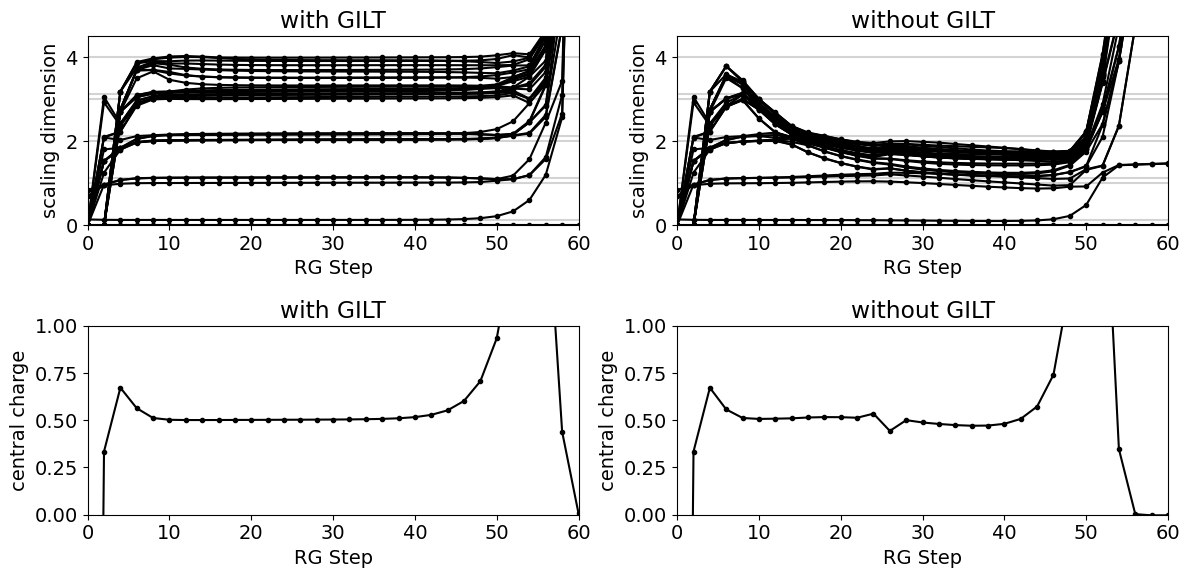

In [27]:


plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 14,'legend.fontsize':14,'xtick.labelsize':14,'ytick.labelsize':14})

plt.subplot(221)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('with GILT')

plt.subplot(222)

for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

mask=scd_cyl_iLayer%2==0
for i in range(scd_cyl_NG.shape[1]):
    plt.plot(scd_cyl_iLayer[mask],scd_cyl_NG[mask,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('without GILT')

nk=16



plt.subplot(223)
plt.plot(scd_cyl_iLayer[mask],curve1M['center_charge'][mask],'.-',color='black')
plt.xlim(0,60)
plt.ylim(0,1)
plt.xlabel('RG Step')
plt.ylabel('central charge')
plt.title('with GILT')


plt.subplot(224)
plt.plot(scd_cyl_iLayer[mask],curve1NG['center_charge'][mask],'.-',color='black')
plt.xlim(0,60)
plt.ylim(0,1)
plt.xlabel('RG Step')
plt.ylabel('central charge')
plt.title('without GILT')





# plt.rcParams['axes.titley'] = 1.0
# plt.rcParams['axes.titlepad'] = -14


plt.tight_layout()
plt.show()
    


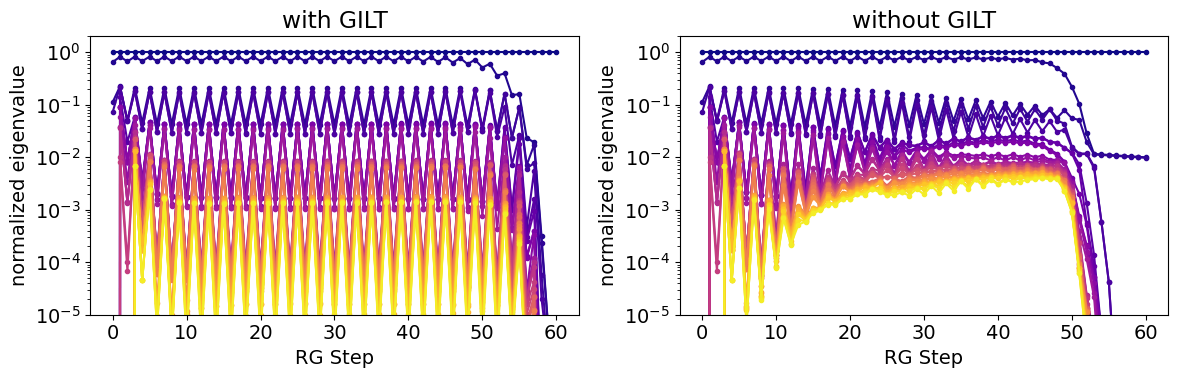

In [28]:
eigs1M=np.array(curve1M['eigs'].tolist())
eigs1NG=np.array(curve1NG['eigs'].tolist())

plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size': 14,'legend.fontsize':14,'xtick.labelsize':14,'ytick.labelsize':14})

plt.subplot(121)
cmap=plt.get_cmap('plasma')
for i in range(eigs1M.shape[1]):
    plt.plot(eigs1M[:,i]/eigs1M[:,0],'.-',color=cmap(i/eigs1M.shape[1]))
plt.yscale('log')
plt.ylim(1e-5,2)
plt.title('with GILT')
plt.xlabel('RG Step')
plt.ylabel('normalized eigenvalue')

plt.subplot(122)
for i in range(eigs1NG.shape[1]):
    plt.plot(eigs1NG[:,i]/eigs1NG[:,0],'.-',color=cmap(i/eigs1NG.shape[1]))
plt.yscale('log')
plt.ylim(1e-5,2)
plt.title('without GILT')
plt.xlabel('RG Step')
plt.ylabel('normalized eigenvalue')

plt.tight_layout()
plt.show()


Text(0.5, 0, 'RG Step')

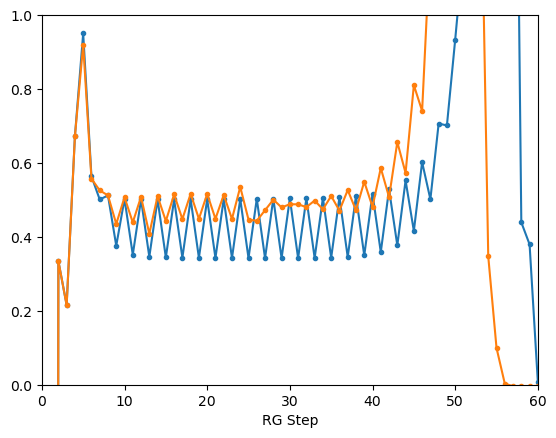

In [133]:
mask=scd_cyl_iLayer%2==0
mask1=scd_cyl_iLayer%2==1

sNG=np.array(curve1NG['center_charge'].copy().to_list())
sNG[mask1]=sNG[mask1]*np.log(2)

sG=np.array(curve1M['center_charge'].copy().to_list())
sG[mask1]=sG[mask1]*np.log(2)

plt.plot(scd_cyl_iLayer,sG,'.-',label='with GILT',color='C0')
plt.plot(scd_cyl_iLayer,sNG,'.-',label='without GILT',color='C1')
plt.ylim(0,1)
plt.xlim(0,60)
plt.xlabel('RG Step')

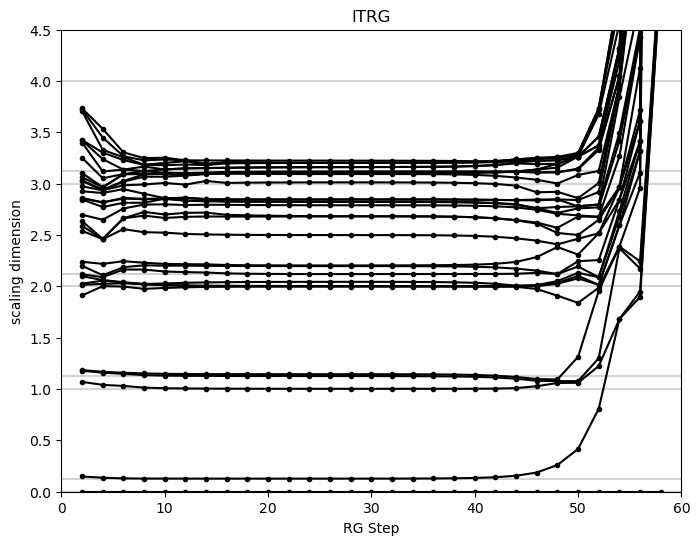

In [20]:
plt.figure(figsize=(8,6))
for reference_scaling_dimension in reference_scaling_dimensions:
    plt.axhline(reference_scaling_dimension,color='lightgrey')

for i in range(scd_ltrg.shape[1]):
    plt.plot(iLayers,scd_ltrg[:,i],'.-',label=ref_scd[i],color='black')

plt.xlim(0,60)
plt.ylim(0,4.5)

plt.xlabel('RG Step')
plt.ylabel('scaling dimension')
plt.title('lTRG')
plt.show()

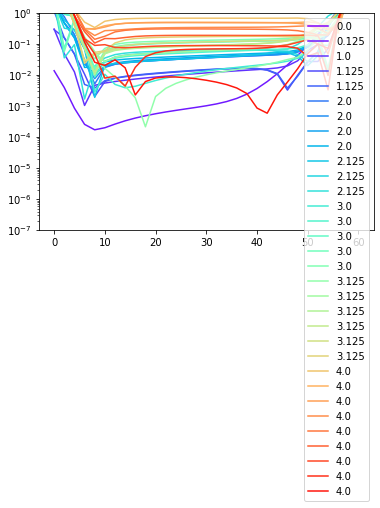

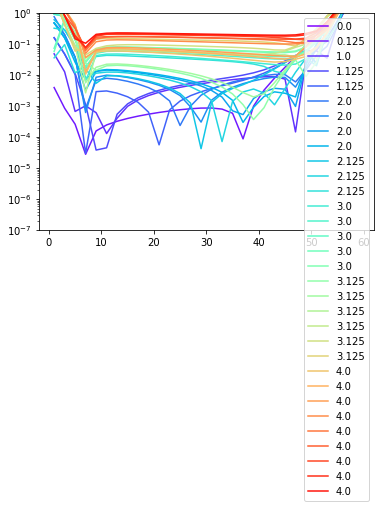

In [38]:
nk=32

curve1=curve_scd_M[curve_scd_M['layer']%2==0]
scd=np.array(curve1['scaling_dimensions'].tolist())
scderr=np.abs(scd[:,:nk]-ref_scd)
cmap=plt.get_cmap('rainbow')
for i in range(scderr.shape[1]):
    plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()

curve1=curve_scd_M[curve_scd_M['layer']%2==1]
scd=np.array(curve1['scaling_dimensions'].tolist())
scderr=np.abs(scd[:,:nk]-ref_scd)
cmap=plt.get_cmap('rainbow')
for i in range(scderr.shape[1]):
    plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()


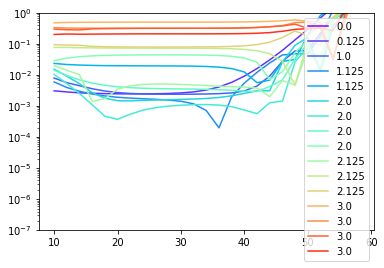

In [41]:
nk=16

scd_ltrg_err=np.abs(scd_ltrg[:,:nk]-ref_scd[:nk])

for i in range(scd_ltrg_err.shape[1]):
    #plt.plot(curve1['layer'],scderr[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
    plt.plot(iLayers,scd_ltrg_err[:,i],'-',color=cmap(i/nk),label=ref_scd[i])
plt.legend()
plt.yscale('log')
plt.ylim(1e-7,1)
plt.show()
    